In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mcp import mcp_curve, mcp_score, plot_mcp_curve
import pandas as pd

# MCP curve plot and area

## Single algorithm

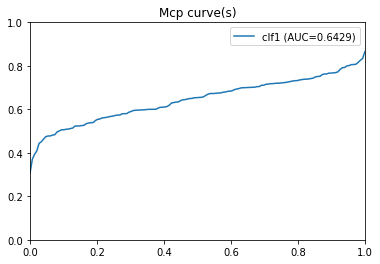

Area under mcp curve is approximately equal to 0.64294511633598


In [2]:
# iris dataset
X, y = load_iris(return_X_y=True)

clf = LogisticRegression(solver="liblinear").fit(X, y)
probabilities = clf.predict_proba(X)
plot_mcp_curve(y, probabilities)

area = mcp_score(y, probabilities)
print("Area under mcp curve is approximately equal to {}".format(area))

## More algorithms

Area under mcp curve for LogisticRegression is equal to 0.64294511633598
Area under mcp curve for RandomForestClassifier is equal to 0.9549343374639889
Area under mcp curve for GradientBoostingClassifier is equal to 0.9927229357094987
Area under mcp curve for SVC is equal to 0.8407550547091514


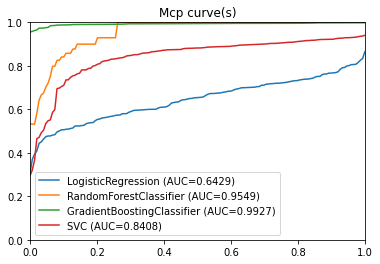

In [3]:
X, y = load_iris(return_X_y=True)
algorithms = {'LogisticRegression': LogisticRegression(solver='liblinear'),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score
    area = mcp_score(y, score)
    print('Area under mcp curve for {} is equal to {}'.format(key, area))

plot_mcp_curve(y, scores)

## Dataset from article

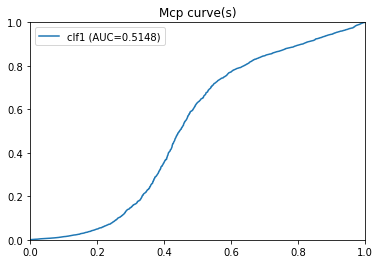

Area under mcp curve is approximately equal to 0.5147802720754062


In [4]:
df = pd.read_csv("test_results.csv")
y_true = df['y_true']
y_score = df.loc[:, 'y_score_1':]

plot_mcp_curve(y_true, y_score)

area = mcp_score(y_true, y_score)
print("Area under mcp curve is approximately equal to {}".format(area))